In [53]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import yaml
import torch
import numpy as np
from matplotlib import pyplot as plt

# Scratch

In [57]:
from torch.autograd import Variable

class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
     
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    
def accScore(y_pred, y_data):
    y_bin = y_pred.clone()
    y_bin[y_bin < 0.5] = 0
    y_bin[y_bin > 0.5] = 1

    correct = (y_bin == y_data).float().sum()
    return (correct/y_data.shape[0]).float().item()

In [58]:
N = 1000
train_size = int(N*0.8)

def sig(x):
    return 1/(1+np.exp(-x))

fts = np.random.normal(scale=2, size=N)
probs = sig(fts)
labels = np.random.binomial(1, probs, size=N).reshape(-1,1)
fts = fts.reshape(-1,1)

x_data = Variable(torch.Tensor(fts))
y_data = Variable(torch.Tensor(labels))

In [66]:
model = LogisticRegression()
list(model.parameters())

[Parameter containing:
 tensor([[-0.8397]], requires_grad=True),
 Parameter containing:
 tensor([0.7580], requires_grad=True)]

In [67]:
accScore(model(x_data[train_size:]), y_data[train_size:])

0.25999999046325684

In [68]:
criterion = torch.nn.BCELoss(reduction='mean')

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
epochs = 200

val_loss = np.zeros(epochs+1)
val_score = np.zeros(epochs+1)

val_loss[0] = criterion(model(x_data[train_size:]), y_data[train_size:])
val_score[0] = accScore(model(x_data[train_size:]), y_data[train_size:])

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_data[:train_size])
    loss = criterion(y_pred, y_data[:train_size])
    loss.backward()
    optimizer.step()
    
    val_loss[epoch+1] = criterion(model(x_data[train_size:]), y_data[train_size:])
    val_score[epoch+1] = accScore(model(x_data[train_size:]), y_data[train_size:])

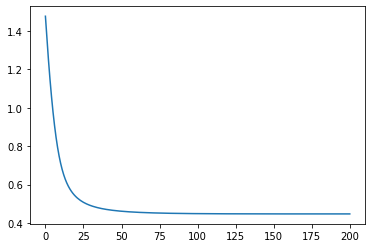

In [69]:
plt.plot(val_loss)

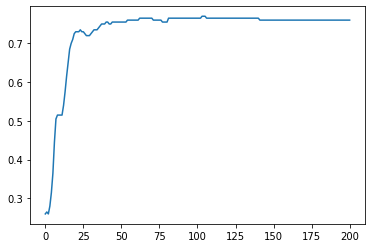

In [70]:
plt.plot(val_score)